In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

crash_df = pd.read_csv('/content/crashdata2022-present.csv')
vehicle_df = pd.read_csv('/content/vehiclecrashdata2022-present.csv')

In [2]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11496 entries, 0 to 11495
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CrashFactId                11496 non-null  int64  
 1   Name                       11496 non-null  object 
 2   MinorInjuries              11496 non-null  int64  
 3   ModerateInjuries           11496 non-null  int64  
 4   SevereInjuries             11496 non-null  int64  
 5   FatalInjuries              11496 non-null  int64  
 6   TcrNumber                  11496 non-null  object 
 7   CityDamageFlag             11496 non-null  bool   
 8   ShortFormFlag              11496 non-null  bool   
 9   Distance                   10895 non-null  float64
 10  CrashDateTime              11496 non-null  object 
 11  PedestrianAction           11496 non-null  object 
 12  RoadwaySurface             11496 non-null  object 
 13  RoadwayCondition           11496 non-null  obj

In [3]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25694 entries, 0 to 25693
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CrashName                   25694 non-null  object 
 1   Name                        25694 non-null  object 
 2   Sex                         18192 non-null  object 
 3   Age                         25694 non-null  int64  
 4   Speed                       0 non-null      float64
 5   VehicleDamage               24945 non-null  object 
 6   PartyCategory               25694 non-null  object 
 7   Sobriety                    25694 non-null  object 
 8   VehicleDirection            25694 non-null  object 
 9   MovementPrecedingCollision  25694 non-null  object 
 10  PartyType                   25694 non-null  object 
 11  OtherAssociatedFactor       25694 non-null  object 
 12  VehicleCount                25694 non-null  int64  
 13  ViolationCode               256

In [4]:
# label encoding CollisionType
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
crash_df['CollisionTypeConverted'] = le.fit_transform(crash_df['CollisionType'])
crash_df['CollisionTypeConverted']

,CollisionTypeConverted
0,5
1,5
2,5
3,3
4,7
...,...
11491,2
11492,3
11493,6
11494,6


In [5]:
# Label encoding for the lighting feature
crash_df['LightingConverted'] = le.fit_transform(crash_df['Lighting'])
# label encoding for the weather feature
crash_df['WeatherConverted'] = le.fit_transform(crash_df['Weather'])
# label encoding for the road surface feature
crash_df['RoadwaySurfaceConverted'] = le.fit_transform(crash_df['RoadwaySurface'])

In [6]:
# convert 'MinorInjuries', 'ModerateInjuries', 'SevereInjuries', 'FatalInjuries' columns to a single column
crash_df['Severity'] = np.argmax(crash_df[['MinorInjuries', 'ModerateInjuries', 'SevereInjuries', 'FatalInjuries']], axis=1)
crash_df['Severity'].describe()

,Severity
count,11496.000000
mean,0.196590
std,0.524453
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


In [7]:
# convert datatype of CrashDateTime column into numerical values

def map_hour_to_group(hour):
  if hour >= 0 and hour < 4:
    return 0
  elif hour >= 4 and hour < 8:
    return 1
  elif hour >= 8 and hour < 12:
    return 2
  elif hour >= 12 and hour < 16:
    return 3
  elif hour >=16  and hour < 20:
    return 4
  elif hour >= 20 and hour < 24:
    return 5

crash_df['CrashHour'] = pd.to_datetime(crash_df['CrashDateTime']).dt.hour
crash_df['CrashHourGroup'] = crash_df['CrashHour'].apply(map_hour_to_group)
crash_df['CrashHourGroup']

<ipython-input-7-7bbc2a142cb7>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crash_df['CrashHour'] = pd.to_datetime(crash_df['CrashDateTime']).dt.hour


,CrashHourGroup
0,3
1,5
2,5
3,2
4,4
...,...
11491,5
11492,5
11493,3
11494,3


In [8]:
# combine crash_df and vehicle_df using "Name" and "CrashName"
merged_df = pd.merge(crash_df, vehicle_df, left_on='Name', right_on='CrashName', how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CrashFactId                 23735 non-null  int64  
 1   Name_x                      23735 non-null  object 
 2   MinorInjuries_x             23735 non-null  int64  
 3   ModerateInjuries_x          23735 non-null  int64  
 4   SevereInjuries_x            23735 non-null  int64  
 5   FatalInjuries_x             23735 non-null  int64  
 6   TcrNumber                   23735 non-null  object 
 7   CityDamageFlag              23735 non-null  bool   
 8   ShortFormFlag               23735 non-null  bool   
 9   Distance                    22507 non-null  float64
 10  CrashDateTime               23735 non-null  object 
 11  PedestrianAction            23735 non-null  object 
 12  RoadwaySurface              23735 non-null  object 
 13  RoadwayCondition            237

In [9]:
# label encoding for the Sobriety
merged_df['SobrietyConverted'] = le.fit_transform(merged_df['Sobriety'])
# label encoding for the Sex
merged_df['SexConverted'] = le.fit_transform(merged_df['Sex'])

In [10]:
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = merged_df[['Severity','CityDamageFlag', 'CrashHourGroup', 'RoadwaySurfaceConverted', 'LightingConverted', 'WeatherConverted', 'CollisionTypeConverted', 'SpeedingFlag', 'SexConverted','SobrietyConverted']], merged_df['HitAndRunFlag']


In [11]:
# Check information of X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Severity                 23735 non-null  int64
 1   CityDamageFlag           23735 non-null  bool 
 2   CrashHourGroup           23735 non-null  int64
 3   RoadwaySurfaceConverted  23735 non-null  int64
 4   LightingConverted        23735 non-null  int64
 5   WeatherConverted         23735 non-null  int64
 6   CollisionTypeConverted   23735 non-null  int64
 7   SpeedingFlag             23735 non-null  bool 
 8   SexConverted             23735 non-null  int64
 9   SobrietyConverted        23735 non-null  int64
dtypes: bool(2), int64(8)
memory usage: 1.5 MB


In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
# !pip install xgboost

In [14]:
# Create and apply logistic regression model
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
lr = LogisticRegression(random_state=42)

# fit the model with data
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

y_pred

array([False, False, False, ...,  True,  True, False])

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy Score: " + str(accuracy))

Accuracy Score: 75.88473205257836


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Logistic Regression with (2022-present crash / vehicles datasets)")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Logistic Regression with (2022-present crash / vehicles datasets)
Accuracy: 0.7588473205257836
Precision: 0.6140888208269525
Recall (Sensitivity): 0.2537974683544304
F1-Score: 0.35915808329601434


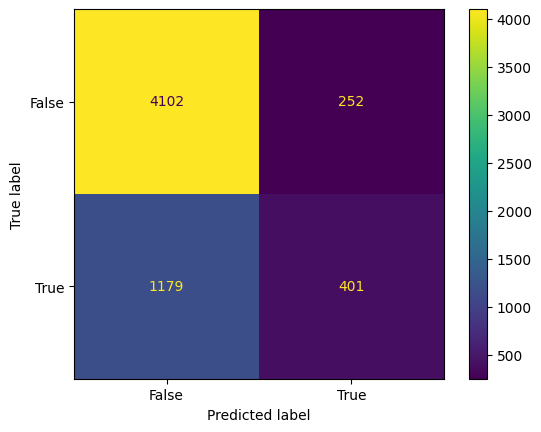

In [19]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()

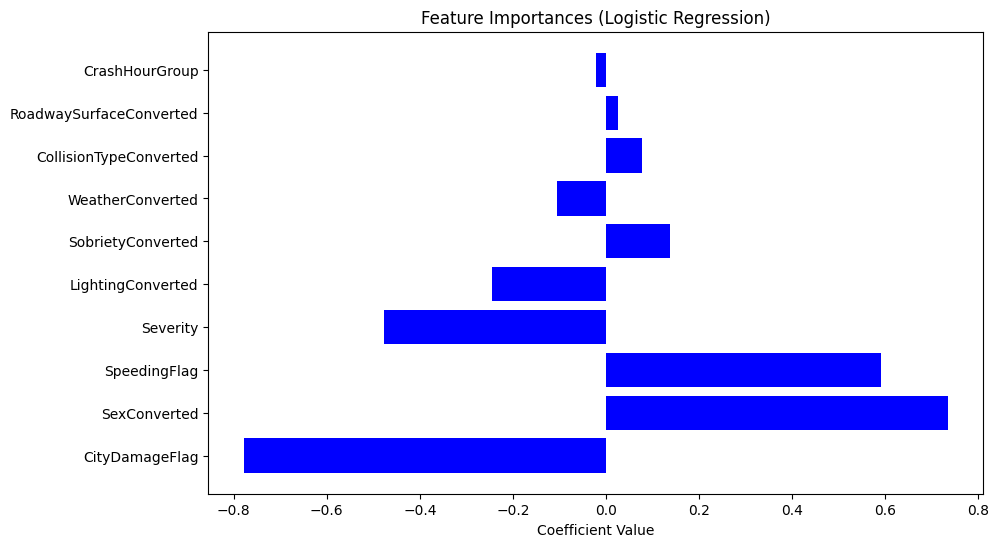

In [ ]:
importances = lr.coef_[0]
feature_names = X_train.columns

indices = np.argsort(np.abs(importances))[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Logistic Regression)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Coefficient Value')
plt.show()

In [ ]:
merged_df['HitAndRunFlag'].value_counts()

,count
HitAndRunFlag,
False,17499
True,6236
